In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
#data=pd.read_csv('../Data/TEFDaily.csv',index_col=['Date'],parse_dates=True,infer_datetime_format=True)
data = yf.download(tickers = 'REP.MC', start = '2012-03-11',end = '2022-11-25')
#data.index = pd.DatetimeIndex(data.index).to_period('D')
from  datetime import date
data.head(10)
#Comprobar que aparecen fechas en orden
#si no df = df.sort_values(by='Date') 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,19.480000,19.480000,19.125000,19.184999,9.466008,19423892
2012-03-13,19.205000,19.565001,19.184999,19.500000,9.621432,16365242
2012-03-14,19.280001,19.485001,18.905001,18.975000,9.362391,17033016
2012-03-15,18.920000,19.334999,18.850000,19.180000,9.463541,27307087
2012-03-16,19.219999,19.315001,18.844999,18.844999,9.298251,25585188
2012-03-19,18.750000,19.025000,18.695000,19.020000,9.384597,21231870
2012-03-20,19.150000,19.410000,19.049999,19.275000,9.510417,9337670
2012-03-21,19.280001,20.465000,19.120001,20.100000,9.917477,30654288
2012-03-22,20.160000,20.340000,19.455000,19.620001,9.680642,15646088


In [12]:
data.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-24,14.32,14.49,14.21,14.455,14.455,2693971


In [13]:
today=date.today()
#today=(today.strftime('%m/%d/%Y'))
today=(today.strftime('%Y-%m-%d'))
today

'2022-12-05'

In [14]:

data=(data.loc['2022-1-1':'2022-12-31'])
#data=(data.loc['2022-7-1':today])
#data

In [15]:
# Adding indicators
#data['RSI']=ta.rsi(data.Close, length=15)
#data['EMAF']=ta.ema(data.Close, length=20)
#data['EMAM']=ta.ema(data.Close, length=100)
#data['EMAS']=ta.ema(data.Close, length=150)

'''
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)
'''

#data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)


data.reset_index(inplace = True)
#data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
data.drop(['Close', 'Date'], axis=1, inplace=True)
data.dropna(inplace=True)
numregressors=data.shape[1]-3

/tmp/ipykernel_7993/1983891571.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close']-data.Open
/tmp/ipykernel_7993/1983891571.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Target'].shift(-1)
/tmp/ipykernel_7993/1983891571.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

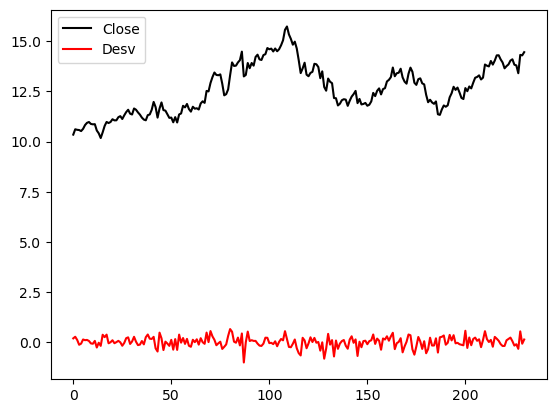

"\nplt.figure(figsize=(16,8))\nplt.plot(y_test, color = 'black', label = 'Test')\nplt.plot(y_pred, color = 'green', label = 'pred')\nplt.legend()\nplt.show()\n"

In [16]:

plt.plot(data['TargetNextClose'],color = 'black', label = 'Close')
plt.plot(data['Target'],color = 'red', label = 'Desv')
plt.legend()
plt.show()
'''
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()
'''

In [17]:
data_set = data.iloc[:, 0:data.shape[1]]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,Volume,Target,TargetClass,TargetNextClose
0,10.456,10.696,10.440,10.114118,11340948,0.192000,1,10.345885
1,10.700,10.976,10.698,10.345885,51878743,0.272000,1,10.611846
2,10.900,11.190,10.892,10.611846,24976847,0.114000,1,10.585249
3,11.030,11.246,10.900,10.585249,11476599,-0.128000,0,10.573536
4,10.960,10.968,10.662,10.573536,5794599,-0.070001,0,10.522777
5,10.850,10.912,10.730,10.522777,4189280,0.136001,1,10.632104
6,10.756,10.902,10.740,10.632104,4247483,0.102000,1,10.821475
7,10.984,11.178,10.970,10.821475,8870360,0.113999,1,10.932755
8,11.086,11.200,11.032,10.932755,4061481,0.061999,1,10.973752
9,11.180,11.266,11.086,10.973752,4262272,-0.060000,0,10.878091


In [18]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)

#print(len(yi))

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)



[[0.01996087 0.         0.02799929 ... 0.72192231 1.         0.03068553]
 [0.06344679 0.05059627 0.07371971 ... 0.76997031 1.         0.07851943]
 [0.09909103 0.08926627 0.10809863 ... 0.67507542 1.         0.07373587]
 ...
 [0.60434856 0.58438752 0.54191037 ... 0.93093107 1.         0.74544298]
 [0.61236853 0.65666791 0.61899693 ... 0.56156183 0.         0.74094671]
 [0.71751916 0.71268533 0.69608365 ... 0.68768798 1.         0.76972321]]


In [20]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 40
print(data_set_scaled.shape[0])
for j in range(numregressors):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X)
#print(X.shape)
#print(y)
#print(y.shape)

231


In [21]:
'''
Va haciendo grupso de longitud backcandle.Por ejemplo si backcandle =10
al final esta vb es el nuemro de dias que cojo para uan predicción

X seria
 0  1  2  3  4  5  6  7  8  9]
  [ 1  2  3  4  5  6  7  8  9 10]
  [ 2  3  4  5  6  7  8  9 10 11]
  [ 3  4  5  6  7  8  9 10 11 12]

j es el numero de columnas

i va desde del numero de backcandle hasta al total de registros

para y elimina tantos primeros registros como longitud del bacakcandle

[110]
 [111]
 [112]
 [113]
 [114]
 
Matrices para probar el bucle

arr1=np.arange(100)
arr2=np.arange(100,200)
arr=np.c_[arr1,arr2]

En los nuevos shapes sale el total de la longitud menos backcandle

'''



'\nVa haciendo grupso de longitud backcandle.Por ejemplo si backcandle =10\nal final esta vb es el nuemro de dias que cojo para uan predicción\n\nX seria\n 0  1  2  3  4  5  6  7  8  9]\n  [ 1  2  3  4  5  6  7  8  9 10]\n  [ 2  3  4  5  6  7  8  9 10 11]\n  [ 3  4  5  6  7  8  9 10 11 12]\n\nj es el numero de columnas\n\ni va desde del numero de backcandle hasta al total de registros\n\npara y elimina tantos primeros registros como longitud del bacakcandle\n\n[110]\n [111]\n [112]\n [113]\n [114]\n \nMatrices para probar el bucle\n\narr1=np.arange(100)\narr2=np.arange(100,200)\narr=np.c_[arr1,arr2]\n\nEn los nuevos shapes sale el total de la longitud menos backcandle\n\n'

In [22]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [23]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

152
(152, 40, 5)
(39, 40, 5)
(152, 1)
(39, 1)
[[0.25245795]
 [0.32373591]
 [0.27703645]
 [0.18293533]
 [0.2640449 ]
 [0.31917121]
 [0.25035115]
 [0.24578662]
 [0.21242964]
 [0.18082871]
 [0.18328661]
 [0.14115168]
 [0.18749986]
 [0.13939616]
 [0.21172744]
 [0.22015463]
 [0.28897469]
 [0.27492965]
 [0.30547745]
 [0.25983148]
 [0.23665739]
 [0.28054784]
 [0.2633427 ]
 [0.26702938]
 [0.25561788]
 [0.31004198]
 [0.32935392]
 [0.31530906]
 [0.42240156]
 [0.41801267]
 [0.49350405]
 [0.54617263]
 [0.58742971]
 [0.56548457]
 [0.56285103]
 [0.57075131]
 [0.48648162]
 [0.38290017]
 [0.39343399]
 [0.43644659]
 [0.56285103]
 [0.67784398]
 [0.64624269]
 [0.64887623]
 [0.67784398]
 [0.69803342]
 [0.774403  ]
 [0.55231721]
 [0.56548457]
 [0.67257707]
 [0.62605325]
 [0.67257707]
 [0.64887623]
 [0.72700116]
 [0.74719095]
 [0.70505602]
 [0.69978911]
 [0.74367956]
 [0.75157984]
 [0.80688195]
 [0.79547029]
 [0.80161487]
 [0.77615852]
 [0.80249272]
 [0.77791404]
 [0.79634814]
 [0.83146046]
 [0.87622876]
 [

In [24]:

#from keras.layers import TimeDistributed

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,LSTM, Input, Activation, concatenate

from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import History
#from keras.models import Model

import numpy as np
#tf.random.set_seed(20)
#np.random.seed(10)
neuronas=100
lstm_input = Input(shape=(backcandles, numregressors), name='lstm_input')
#inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = LSTM(neuronas, name='first_layer',return_sequences=True)(lstm_input)
inputs = LSTM(neuronas, name='Second_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()


2022-12-05 17:01:39.815075: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-05 17:01:41.407134: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-05 17:01:41.407660: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-12-05 17:01:41.511285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 17:01:41.512192: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GT 1030 computeCapability: 6.1
coreClock: 1.468GHz coreCount: 3 deviceMemorySize: 1.95GiB deviceMemoryBandwidth: 44.76GiB/s
2022-12-05 17:01:41.512304: I tensorflow/stream_executor/platform/default/dso_

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_input (InputLayer)      [(None, 40, 5)]           0         
_________________________________________________________________
Second_layer (LSTM)          (None, 100)               42400     
_________________________________________________________________
dense_layer (Dense)          (None, 1)                 101       
_________________________________________________________________
output (Activation)          (None, 1)                 0         
Total params: 42,501
Trainable params: 42,501
Non-trainable params: 0
_________________________________________________________________


In [28]:
%%time
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
10/10 [==============================] - 1s 27ms/step - loss: 0.0057 - val_loss: 0.0065
Epoch 2/30
10/10 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0102
Epoch 3/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0119
Epoch 4/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 5/30
10/10 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.0114
Epoch 6/30
10/10 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0078
Epoch 7/30
10/10 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0131
Epoch 8/30
10/10 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0079
Epoch 9/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0137
Epoch 10/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0107
Epoch 11/30
10/10 

<AxesSubplot:>

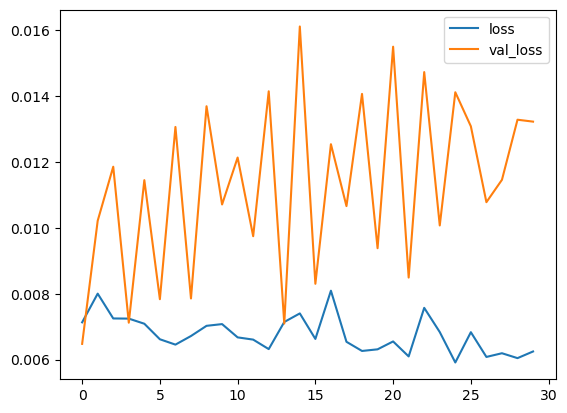

In [29]:

losses=pd.DataFrame(model.history.history)
losses.plot()

In [30]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

[0.2970973] [0.36505336]
[0.30766544] [0.40192327]
[0.32452485] [0.45947626]
[0.3526014] [0.43159905]
[0.37954012] [0.45228214]
[0.40486723] [0.40911739]
[0.4277905] [0.35965781]
[0.43752453] [0.34976583]
[0.4228541] [0.44778587]
[0.42096215] [0.41990866]


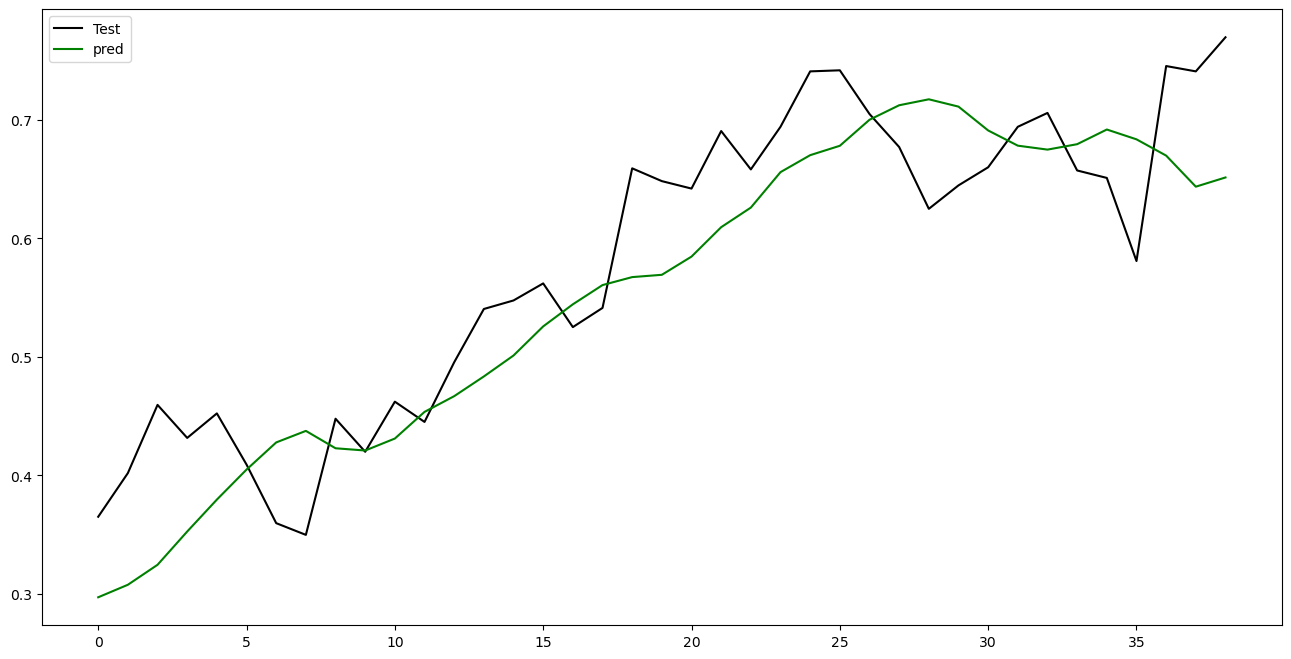

In [31]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

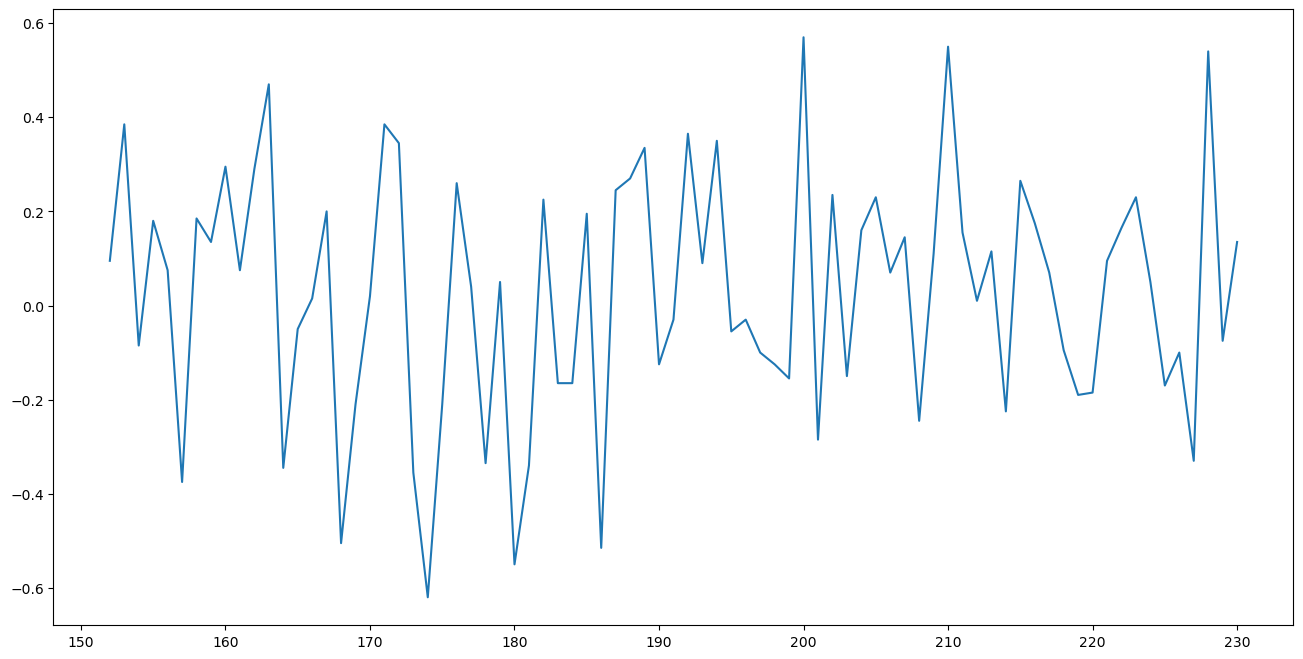

In [32]:
plt.figure(figsize=(16,8))
plt.plot(data_set[splitlimit:]['Target'])
#plt.plot(y_pred)
#plt.plot(range((data_set.index[splitlimit:][0]),data_set.index[splitlimit:][0]+data_set.index[splitlimit:][1]),y_pred, color = 'green', label = 'pred')
#y_pred.shape
#data_set.index[splitlimit:][0]

In [33]:
#data_set[splitlimit:]

## Forecast

In [35]:
#data=pd.read_csv('../Data/TEFDaily.csv',index_col=['Date'],parse_dates=True,infer_datetime_format=True)
#data=(data.loc['2022-1-1':'2022-10-27'])
data = yf.download(tickers = 'REP.MC', start = '2012-03-11',end = '2022-11-25')

[*********************100%***********************]  1 of 1 completed


In [36]:
'''
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)
'''
data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
#data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
data.drop(['Close', 'Date'], axis=1, inplace=True)
numregressors=data.shape[1]-3

In [37]:
data_set = data.iloc[:, 0:data_set.shape[1]]#.values
pd.set_option('display.max_columns', None)

In [38]:
data_set.shape

(2738, 8)

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)


In [40]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 40
print(data_set_scaled.shape[0])
for j in range(numregressors):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X)
#print(X.shape)
#print(y)
#print(y.shape)

2738


In [41]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,LSTM, Input, Activation, concatenate

from tensorflow.keras import optimizers
#from keras.callbacks import History
#from keras.models import Model

import numpy as np
#tf.random.set_seed(20)
#np.random.seed(10)


'''
lstm_input = Input(shape=(backcandles, numregressors), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
'''
lstm_input = Input(shape=(backcandles, numregressors), name='lstm_input')

#inputs = LSTM(150, name='first_layer')(lstm_input)

inputs = LSTM(neuronas, name='first_layer',return_sequences=True)(lstm_input)
inputs = LSTM(neuronas, name='Second_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()



In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_input (InputLayer)      [(None, 40, 5)]           0         
_________________________________________________________________
Second_layer (LSTM)          (None, 100)               42400     
_________________________________________________________________
dense_layer (Dense)          (None, 1)                 101       
_________________________________________________________________
output (Activation)          (None, 1)                 0         
Total params: 42,501
Trainable params: 42,501
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer=adam, loss='mse')
model.fit(x=X, y=y, batch_size=15, epochs=losses.idxmin()[0], shuffle=True, validation_split = 0.1)
#Probar con epochs=losses.idxmin()[0]. De momemto mejor resultado con epochs a 30

Epoch 1/24
162/162 [==============================] - 2s 9ms/step - loss: 0.0190 - val_loss: 0.0034
Epoch 2/24
162/162 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 3/24
162/162 [==============================] - 1s 7ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 4/24
162/162 [==============================] - 1s 7ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 5/24
162/162 [==============================] - 1s 7ms/step - loss: 7.9899e-04 - val_loss: 0.0018
Epoch 6/24
162/162 [==============================] - 1s 7ms/step - loss: 8.0811e-04 - val_loss: 0.0019
Epoch 7/24
162/162 [==============================] - 1s 7ms/step - loss: 9.8503e-04 - val_loss: 0.0017
Epoch 8/24
162/162 [==============================] - 1s 6ms/step - loss: 7.6092e-04 - val_loss: 0.0016
Epoch 9/24
162/162 [==============================] - 1s 8ms/step - loss: 6.9422e-04 - val_loss: 0.0016
Epoch 10/24
162/162 [==============================] - 1s 7ms/step - loss: 7.796

In [52]:
#Numero de dias a predecir
ndias=7
forecast=model.predict(X[-ndias:,::,::])
forecast=np.array(forecast)


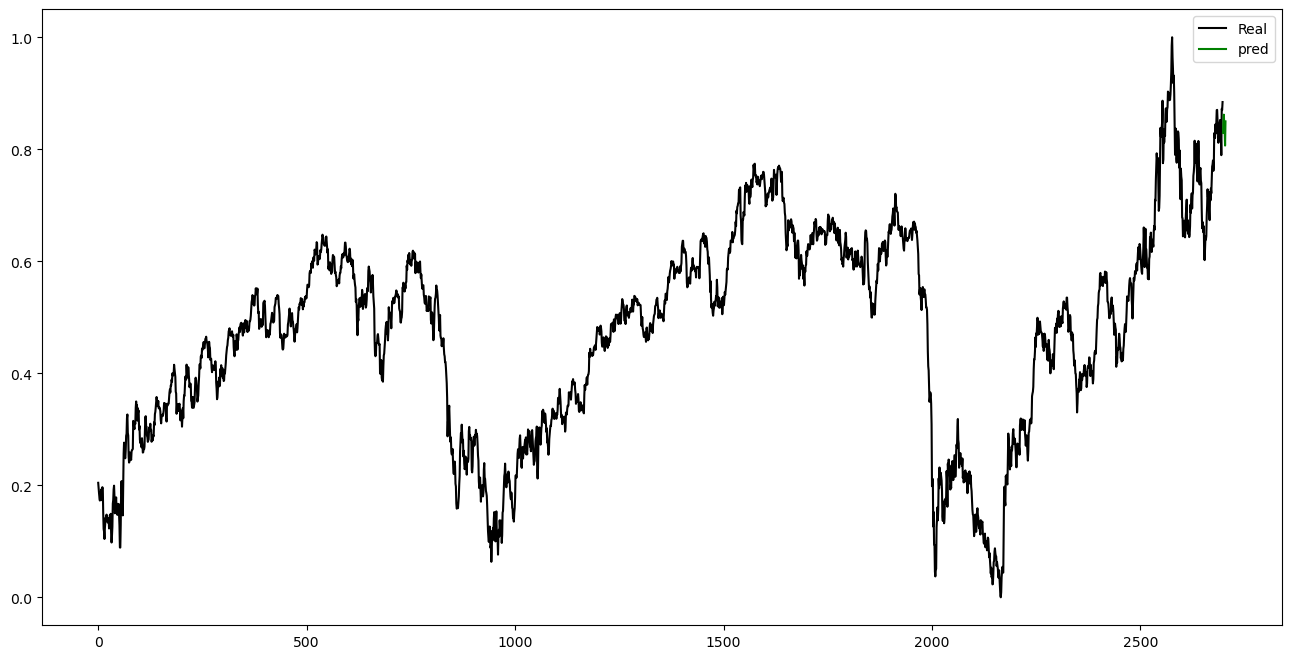

In [53]:
plt.figure(figsize=(16,8))
plt.plot(y, color = 'black', label = 'Real')
#Para ponerlo a continuación sino representa  a partir de  indice 1
plt.plot(range(X.shape[0],X.shape[0]+forecast.shape [0]),forecast, color = 'green', label = 'pred')
plt.legend()
plt.show()



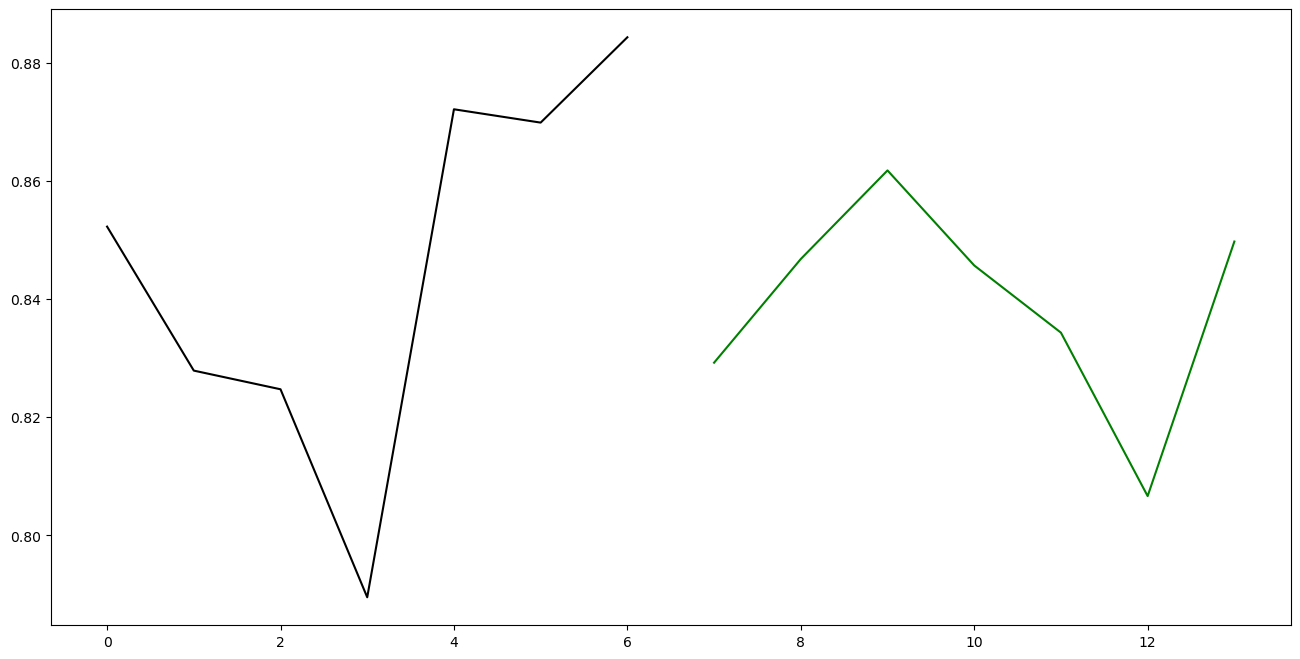

In [54]:
#en mas detalle y poniendo forecast a continuación del indice de la ultiam predicción
plt.figure(figsize=(16,8))
plt.plot(y[-ndias:], color = 'black', label = 'Real')
plt.plot(range(forecast.shape[0],forecast.shape[0]*2),forecast, color = 'green', label = 'pred')

In [47]:
aux=np.ones((forecast.shape[0],data_set.shape[1]-1))

In [48]:
forecast=np.c_[aux,forecast]

In [49]:
forecastInv=sc.inverse_transform(forecast)
forecastInv[::,-1]

array([13.84486272, 14.03924993, 14.2053666 , 14.02719922, 13.90117153,
       13.59475135, 14.07205187])

In [50]:
print("Minimo:{}".format(forecastInv[::,-1].min()))
print("Max:{}".format(forecastInv[::,-1].max()))

Minimo:13.594751347982735
Max:14.205366598367133


In [43]:
#ojo si quiero inicializar o ir guardando valores
#anterioresdif=[]

In [44]:
#Diferencias aprox


print((forecastInv[::,-1].min() - 3.280))

print((forecastInv[::,-1].max()- 3.5010))

anterioresdif.append(forecastInv[::,-1].min() - 3.280)
anterioresdif.append(forecastInv[::,-1].max()- 3.4700)

-0.08878309201717371
-0.21637266253805132


NameError: name 'anterioresdif' is not defined

(6, 12)

In [142]:
'''
Quiero ver ahora la diferencia en euros. Como el escaler estan en dimension 11, 
anoto las diferencias y lo relleno con matriz de unos hasta 11 dimensiones
'''

'\nQuiero ver ahora la diferencia en euros. Como el escaler estan en dimension 11, \nanoto las diferencias y lo relleno con matriz de unos hasta 11 dimensiones\n'

In [143]:

#MAL
anterioresdifMat=np.array(anterioresdif)
anterioresdifMat=anterioresdifMat.reshape(-1,1)
anterioresdifMataux=np.ones((anterioresdifMat.shape[0],data_set.shape[1]-1))
anterioresdifMat=np.c_[anterioresdifMataux,anterioresdifMat]
anterioresdifMatINV=sc.inverse_transform(anterioresdifMat)
anterioresdifMatINV[::,-1]
print ("diferencia en euros {}".format(anterioresdifMatINV[::,-1]))

diferencia en euros [-0.55433776 -1.38015121 -1.07517125 -2.14504968 -0.1055862  -1.16132166]


In [144]:
#anterioresdif=[]